# Conductance-Based Spiking Neural Network

Following derivatives are used for computing input estimate of the input signal and the voltage of neuron $\textit{i}$

$\frac{d\hat{x}}{dt} = -\frac{1}{\tau}\hat{x} + \displaystyle \sum^{N}_{k = 1} D_{k} s_{k}$

$\frac{dV_{i}}{dt} = -\frac{1}{\tau}V_{i} + D^{T}_{i} c - (V - E) \displaystyle\sum^{N}_{k - 1} (D_{i}^{T} D_{k}) s_{k}$

## Single-neuron

Initialize parameters

In [7]:
import numpy as np
import pylab as pl
from scipy.signal import sweep_poly
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.animation as animation
import random
import copy
import scipy.integrate as integrate
import sys
import scipy

Following functions are used for plotting the results

In [8]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    
    return [float('nan') if x==0 else x for x in values]

In [11]:
def multiplylist(vec, i):
    """ Multiplies every vector in a list with a scalar i. """
    
    new_vec = []
    
    for t in range(0, len(vec)):
        new_vec.append(vec[t] * i)
        
    return new_vec

Initialize parameters

In [1]:
def initialize_params_single(dt, iterations, gamma):
    
    # timesteps
    t = np.arange(0, iterations) * dt

    # input estimate
    x_est = np.zeros(iterations)

    # spike train
    o = np.zeros(iterations)

    # voltage
    voltage = np.zeros(iterations)

    # threshold
    T = (gamma**2) / 2

    # spike times
    spike = []
    t_spike = []
    
    return (t, x_est, o, voltage, T, spike, t_spike) 

Create time varying signal

In [2]:
def TVS_single():
    
    # create time-varying signal
    x = 5
    x_t = np.ones(iterations) * x

    step = 100
    x_t[0:step] = 0
    x_t[iterations - 2 * step:iterations] = 3

    x = gaussian_filter1d(x_t, sigma=20) # smooth signal

    dxdt = np.diff(x)/dt
    c = x[:-1] + dxdt
    
    return (x, c)

Run simulation

In [3]:
def run_single(E):
    for t in range(1, iterations):

        # udpate input estimate
        dxestdt = -x_est[t - 1] + gamma * o[t - 1]
        x_est[t] = x_est[t - 1] + dt * dxestdt 

        # update voltage
        dVdt = -voltage[t - 1] + gamma * c[t - 1] - (gamma ** 2) * o[t - 1] * (voltage[t - 1] - E)
        voltage[t] = voltage[t - 1] + dt * dVdt

        # spike when voltage exceeds threshold
        if voltage[t] > T:
            o[t] = 1/dt #* np.abs(voltage[t] - E_e)

            # save spike times
            spike.append(1)
            t_spike.append(t)

Plot results (input + input estimate, voltage, spikes)

In [4]:
def plot_single():
    plots = 3
    pl.subplots(plots, 1, figsize=(8, 4))

    # enable LaTeX
    pl.rc('text', usetex=True)

    pl.subplot(plots, 1, 1)
    pl.plot(x, label=r'$x$', color='black')
    pl.title('Input and input estimate')
    pl.plot(x_est, label=r'$\hat{x}$', color='gray')
    pl.xlim(0, iterations)
    pl.legend()

    pl.subplot(plots, 1, 2)
    pl.title('Spikes')
    pl.plot(voltage, 'k')
    pl.xlim(0, iterations)
    pl.ylabel('Voltage')

    pl.subplot(plots, 1, 3)
    pl.title('Voltage')
    pl.scatter(t_spike, spike, c='k')
    pl.xlim(0, iterations)
    pl.yticks([])
    pl.xlabel('time')

### One neuron with reversal potential E

The following code computes the trajectory of the input estimate for one neuron with reversal potential E

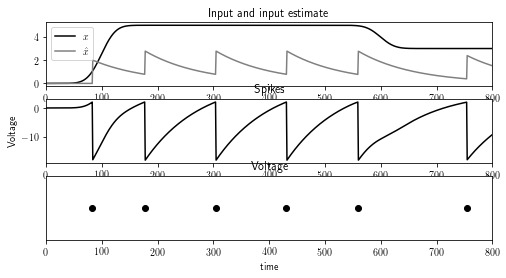

In [9]:
dt = 0.01
iterations = 800
gamma = 2
E = -3

t, x_est, o, voltage, T, spike, t_spike = initialize_params_single(dt, iterations, gamma)
x,c = TVS_single()
run_single(E)
plot_single()

### One neuron with reversal potential E (multiple simulations)

The following code computes the trajectory of the input estimate for one neuron. Different reversal potentials (E) are chosen for the different runs.

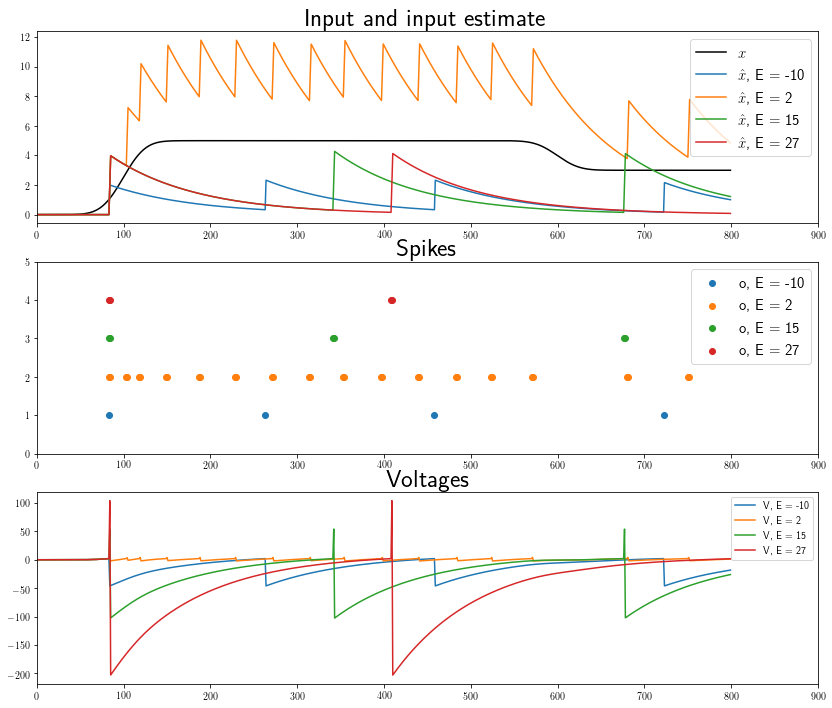

In [12]:
# range 
lines = 4
E = np.linspace(-10, 40, lines + 1)

# time signal
x,c = TVS_single()

# initiate plots
plots = 3
pl.subplots(plots, 1, figsize=(14, 12))

# plot input and input estimate
pl.subplot(plots, 1, 1)
pl.plot(x, 'k', label=r'$x$')
pl.title('Input and input estimate', fontsize=25)
pl.xlim(0, iterations + 100)
for i in range(lines):
    t, x_est, o, voltage, T, spike, t_spike = initialize_params_single(dt, iterations, gamma)
    run_single(E[i])
    pl.plot(x_est, label=r'$\hat{x}$, E = %i' %E[i])
    pl.legend(fontsize=15)
    
# plot spike times
pl.subplot(plots, 1, 2)
pl.title('Spikes', fontsize=25)
pl.ylim(0, i + 2)
pl.xlim(0, iterations + 100)
for i in range(lines):
    t, x_est, o, voltage, T, spike, t_spike = initialize_params_single(dt, iterations, gamma)
    run_single(E[i])
    spike_train = multiplylist(spike, i + 1)
    pl.scatter(t_spike, spike_train, label='o, E = %i' %E[i])
    pl.legend(fontsize=15)
    
# plot voltages
pl.subplot(plots, 1, 3)
pl.title('Voltages', fontsize=25)
pl.xlim(0, iterations + 100)
for i in range(lines):
    t, x_est, o, voltage, T, spike, t_spike = initialize_params_single(dt, iterations, gamma)
    run_single(E[i])
    pl.plot(voltage, label="V, E = %i" %E[i])
    pl.legend()